In [1]:
import keras
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
import matplotlib.pyplot as plt 


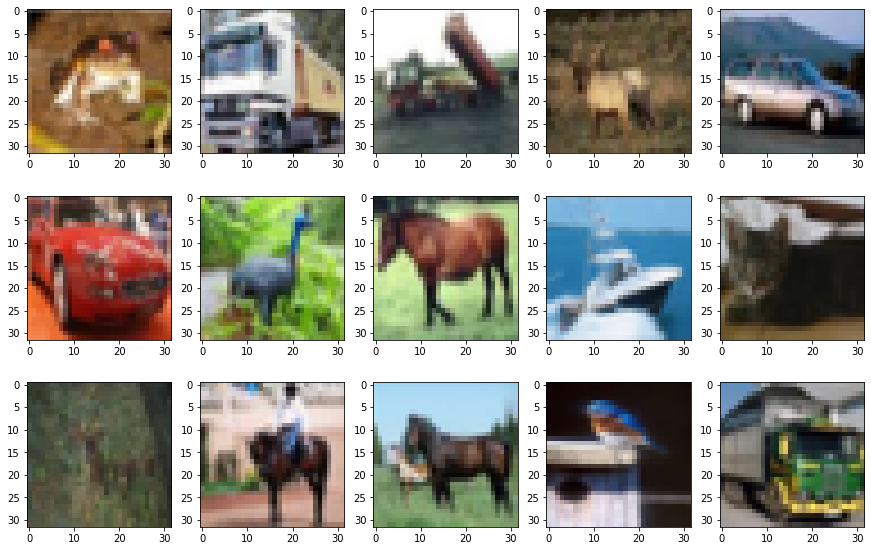

In [10]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.1)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i])
    

In [11]:
x_train_1 = x_train/255.0
x_test_1 = x_test/255.0

In [13]:
x_train[0].shape

(32, 32, 3)

In [17]:
x_train[0][:,:,0]

(32, 32)

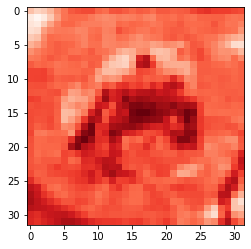

In [29]:
plt.imshow(x_train[0][:,:,0],cmap= 'Reds')

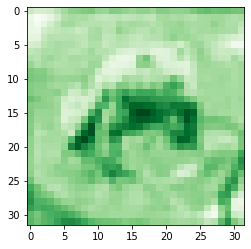

In [31]:
plt.imshow(x_train[0][:,:,1],cmap= 'Greens')

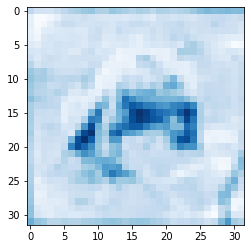

In [32]:
plt.imshow(x_train[0][:,:,2],cmap= 'Blues')

In [34]:
import tensorflow as tf 
from keras import layers
model = keras.models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(x_train_1,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5214 - accuracy: 0.4464
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1603 - accuracy: 0.5899
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0143 - accuracy: 0.6445
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9213 - accuracy: 0.6776
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8472 - accuracy: 0.7054


In [37]:
loss,acc = model.evaluate(x_test_1,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9173 - accuracy: 0.6856
